In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import pathlib
from functools import partial
os.chdir('C:/Users/Charlie/Documents/eggtech')
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential




In [3]:
FILE_PATH = 'data/measurements/rounds-combined.csv'
FOLDER_PATH = 'data/images/split/combined_length'
data_dir = pathlib.Path(FOLDER_PATH)
batch_size = 16
img_height = 1200
img_width = 1600
class_names = ['female', 'male']
print('hi')
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

hi
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6593666912962929475
]


In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 631 files belonging to 2 classes.
Using 505 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 631 files belonging to 2 classes.
Using 126 files for validation.


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [7]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 1200, 1600, 3)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1200, 1600, 16)    448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 600, 800, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 600, 800, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 300, 400, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 300, 400, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 150, 200, 64)      0

In [9]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20


 1/32 [..............................] - ETA: 28:40 - loss: 0.7253 - accuracy: 0.3750

 2/32 [>.............................] - ETA: 6:27 - loss: 33.5991 - accuracy: 0.4844

 3/32 [=>............................] - ETA: 7:04 - loss: 53.2259 - accuracy: 0.5243

 4/32 [==>...........................] - ETA: 6:38 - loss: 58.7554 - accuracy: 0.5378

 5/32 [===>..........................] - ETA: 6:09 - loss: 60.4166 - accuracy: 0.5327

 6/32 [====>.........................] - ETA: 5:47 - loss: 60.1082 - accuracy: 0.5273

 7/32 [=====>........................] - ETA: 5:28 - loss: 58.8243 - accuracy: 0.5234

 8/32 [======>.......................] - ETA: 5:08 - loss: 57.0729 - accuracy: 0.5234

 9/32 [=======>......................] - ETA: 4:53 - loss: 55.1910 - accuracy: 0.5254

10/32 [========>.....................] - ETA: 4:38 - loss: 53.3178 - accuracy: 0.5272

11/32 [=========>....................] - ETA: 4:25 - loss: 51.5022 - accuracy: 0.5284

12/32 [==========>...................] - ETA: 4:11 - loss: 49.7626 - accuracy: 0.5273

13/32 [===========>..................] - ETA: 3:56 - loss: 48.1146 - accuracy: 0.5256

14/32 [============>.................] - ETA: 3:42 - loss: 46.5607 - accuracy: 0.5247

15/32 [=============>................] - ETA: 3:29 - loss: 45.1016 - accuracy: 0.5239

16/32 [==============>...............] - ETA: 3:16 - loss: 43.7307 - accuracy: 0.5241

17/32 [==============>...............] - ETA: 3:03 - loss: 42.4435 - accuracy: 0.5242

18/32 [===============>..............] - ETA: 2:50 - loss: 41.2341 - accuracy: 0.5236

19/32 [================>.............] - ETA: 2:40 - loss: 40.0969 - accuracy: 0.5227

20/32 [=================>............] - ETA: 2:28 - loss: 39.0259 - accuracy: 0.5224

21/32 [==================>...........] - ETA: 2:16 - loss: 38.0158 - accuracy: 0.5226

22/32 [===================>..........] - ETA: 2:03 - loss: 37.0624 - accuracy: 0.5230

23/32 [====================>.........] - ETA: 1:51 - loss: 36.1617 - accuracy: 0.5231

24/32 [=====================>........] - ETA: 1:39 - loss: 35.3088 - accuracy: 0.5232

25/32 [======================>.......] - ETA: 1:26 - loss: 34.5004 - accuracy: 0.5230

26/32 [=======================>......] - ETA: 1:13 - loss: 33.7333 - accuracy: 0.5224

27/32 [========================>.....] - ETA: 1:00 - loss: 33.0122 - accuracy: 0.5217

28/32 [=========================>....] - ETA: 48s - loss: 32.3250 - accuracy: 0.5210 

29/32 [==========================>...] - ETA: 36s - loss: 31.6696 - accuracy: 0.5202

30/32 [===========================>..] - ETA: 24s - loss: 31.0436 - accuracy: 0.5197

31/32 [============================>.] - ETA: 12s - loss: 30.4450 - accuracy: 0.5195

32/32 [==============================] - ETA: 0s - loss: 29.8721 - accuracy: 0.5193 

32/32 [==============================] - 463s 13s/step - loss: 29.3339 - accuracy: 0.5192 - val_loss: 0.6477 - val_accuracy: 0.6508


Epoch 2/20


 1/32 [..............................] - ETA: 9:11 - loss: 0.6164 - accuracy: 0.6875

 2/32 [>.............................] - ETA: 5:53 - loss: 0.6329 - accuracy: 0.6719

 3/32 [=>............................] - ETA: 5:41 - loss: 0.6291 - accuracy: 0.6840

 4/32 [==>...........................] - ETA: 5:30 - loss: 0.6240 - accuracy: 0.6927

 5/32 [===>..........................] - ETA: 5:14 - loss: 0.6192 - accuracy: 0.6992

 6/32 [====>.........................] - ETA: 5:04 - loss: 0.6213 - accuracy: 0.6972

 7/32 [=====>........................] - ETA: 4:51 - loss: 0.6265 - accuracy: 0.6920

 8/32 [======>.......................] - ETA: 4:39 - loss: 0.6304 - accuracy: 0.6875

 9/32 [=======>......................] - ETA: 4:33 - loss: 0.6334 - accuracy: 0.6837

10/32 [========>.....................] - ETA: 4:20 - loss: 0.6359 - accuracy: 0.6803

11/32 [=========>....................] - ETA: 4:11 - loss: 0.6386 - accuracy: 0.6748

12/32 [==========>...................] - ETA: 3:58 - loss: 0.6409 - accuracy: 0.6702

13/32 [===========>..................] - ETA: 3:45 - loss: 0.6431 - accuracy: 0.6667

14/32 [============>.................] - ETA: 3:32 - loss: 0.6451 - accuracy: 0.6637

15/32 [=============>................] - ETA: 3:23 - loss: 0.6469 - accuracy: 0.6603

16/32 [==============>...............] - ETA: 3:11 - loss: 0.6485 - accuracy: 0.6566

17/32 [==============>...............] - ETA: 2:58 - loss: 0.6502 - accuracy: 0.6526

18/32 [===============>..............] - ETA: 2:46 - loss: 0.6517 - accuracy: 0.6492

19/32 [================>.............] - ETA: 2:34 - loss: 0.6530 - accuracy: 0.6465

20/32 [=================>............] - ETA: 2:25 - loss: 0.6542 - accuracy: 0.6445

21/32 [==================>...........] - ETA: 2:14 - loss: 0.6553 - accuracy: 0.6426

22/32 [===================>..........] - ETA: 1:59 - loss: 0.6564 - accuracy: 0.6404

23/32 [====================>.........] - ETA: 1:47 - loss: 0.6573 - accuracy: 0.6383

24/32 [=====================>........] - ETA: 1:35 - loss: 0.6582 - accuracy: 0.6366

25/32 [======================>.......] - ETA: 1:23 - loss: 0.6591 - accuracy: 0.6349

26/32 [=======================>......] - ETA: 1:12 - loss: 0.6598 - accuracy: 0.6336

27/32 [========================>.....] - ETA: 1:00 - loss: 0.6604 - accuracy: 0.6327

28/32 [=========================>....] - ETA: 48s - loss: 0.6609 - accuracy: 0.6319 

29/32 [==========================>...] - ETA: 36s - loss: 0.6615 - accuracy: 0.6310

30/32 [===========================>..] - ETA: 23s - loss: 0.6619 - accuracy: 0.6304

31/32 [============================>.] - ETA: 11s - loss: 0.6624 - accuracy: 0.6296

32/32 [==============================] - ETA: 0s - loss: 0.6629 - accuracy: 0.6289 

32/32 [==============================] - 413s 13s/step - loss: 0.6633 - accuracy: 0.6282 - val_loss: 0.6447 - val_accuracy: 0.6508


Epoch 3/20


 1/32 [..............................] - ETA: 8:35 - loss: 0.6627 - accuracy: 0.6250

 2/32 [>.............................] - ETA: 6:06 - loss: 0.6514 - accuracy: 0.6406

 3/32 [=>............................] - ETA: 6:06 - loss: 0.6430 - accuracy: 0.6562

 4/32 [==>...........................] - ETA: 6:10 - loss: 0.6358 - accuracy: 0.6719

 5/32 [===>..........................] - ETA: 5:46 - loss: 0.6345 - accuracy: 0.6750

 6/32 [====>.........................] - ETA: 5:25 - loss: 0.6341 - accuracy: 0.6753

 7/32 [=====>........................] - ETA: 5:08 - loss: 0.6354 - accuracy: 0.6733

 8/32 [======>.......................] - ETA: 4:52 - loss: 0.6356 - accuracy: 0.6721

 9/32 [=======>......................] - ETA: 4:24 - loss: 0.6377 - accuracy: 0.6680

10/32 [========>.....................] - ETA: 4:16 - loss: 0.6394 - accuracy: 0.6646

11/32 [=========>....................] - ETA: 4:07 - loss: 0.6410 - accuracy: 0.6617

12/32 [==========>...................] - ETA: 3:55 - loss: 0.6425 - accuracy: 0.6588

13/32 [===========>..................] - ETA: 3:46 - loss: 0.6437 - accuracy: 0.6568

14/32 [============>.................] - ETA: 3:34 - loss: 0.6451 - accuracy: 0.6533

15/32 [=============>................] - ETA: 3:21 - loss: 0.6463 - accuracy: 0.6509

16/32 [==============>...............] - ETA: 3:09 - loss: 0.6474 - accuracy: 0.6484

17/32 [==============>...............] - ETA: 3:00 - loss: 0.6484 - accuracy: 0.6467

18/32 [===============>..............] - ETA: 2:48 - loss: 0.6493 - accuracy: 0.6452

19/32 [================>.............] - ETA: 2:37 - loss: 0.6499 - accuracy: 0.6443

20/32 [=================>............] - ETA: 2:24 - loss: 0.6506 - accuracy: 0.6433

21/32 [==================>...........] - ETA: 2:11 - loss: 0.6512 - accuracy: 0.6426

22/32 [===================>..........] - ETA: 1:59 - loss: 0.6518 - accuracy: 0.6415

23/32 [====================>.........] - ETA: 1:47 - loss: 0.6524 - accuracy: 0.6404

24/32 [=====================>........] - ETA: 1:35 - loss: 0.6530 - accuracy: 0.6393

25/32 [======================>.......] - ETA: 1:23 - loss: 0.6535 - accuracy: 0.6381

26/32 [=======================>......] - ETA: 1:11 - loss: 0.6540 - accuracy: 0.6371

27/32 [========================>.....] - ETA: 59s - loss: 0.6545 - accuracy: 0.6362 

28/32 [=========================>....] - ETA: 47s - loss: 0.6549 - accuracy: 0.6354

29/32 [==========================>...] - ETA: 35s - loss: 0.6553 - accuracy: 0.6348

30/32 [===========================>..] - ETA: 23s - loss: 0.6556 - accuracy: 0.6342

31/32 [============================>.] - ETA: 11s - loss: 0.6559 - accuracy: 0.6335

32/32 [==============================] - ETA: 0s - loss: 0.6563 - accuracy: 0.6328 

32/32 [==============================] - 410s 13s/step - loss: 0.6566 - accuracy: 0.6321 - val_loss: 0.6481 - val_accuracy: 0.6508


Epoch 4/20


 1/32 [..............................] - ETA: 8:05 - loss: 0.6974 - accuracy: 0.5625

 2/32 [>.............................] - ETA: 6:12 - loss: 0.6956 - accuracy: 0.5781

 3/32 [=>............................] - ETA: 5:53 - loss: 0.6976 - accuracy: 0.5729

 4/32 [==>...........................] - ETA: 5:35 - loss: 0.6951 - accuracy: 0.5742

 5/32 [===>..........................] - ETA: 5:22 - loss: 0.6941 - accuracy: 0.5744

 6/32 [====>.........................] - ETA: 5:09 - loss: 0.6914 - accuracy: 0.5776

 7/32 [=====>........................] - ETA: 4:57 - loss: 0.6888 - accuracy: 0.5793

 8/32 [======>.......................] - ETA: 4:42 - loss: 0.6861 - accuracy: 0.5830

 9/32 [=======>......................] - ETA: 4:28 - loss: 0.6837 - accuracy: 0.5862

10/32 [========>.....................] - ETA: 4:16 - loss: 0.6806 - accuracy: 0.5907

11/32 [=========>....................] - ETA: 4:03 - loss: 0.6778 - accuracy: 0.5948

12/32 [==========>...................] - ETA: 3:52 - loss: 0.6749 - accuracy: 0.5991

13/32 [===========>..................] - ETA: 3:43 - loss: 0.6726 - accuracy: 0.6025

14/32 [============>.................] - ETA: 3:32 - loss: 0.6708 - accuracy: 0.6054

15/32 [=============>................] - ETA: 3:21 - loss: 0.6698 - accuracy: 0.6067

16/32 [==============>...............] - ETA: 3:09 - loss: 0.6693 - accuracy: 0.6074

17/32 [==============>...............] - ETA: 2:53 - loss: 0.6691 - accuracy: 0.6074

18/32 [===============>..............] - ETA: 2:42 - loss: 0.6687 - accuracy: 0.6077

19/32 [================>.............] - ETA: 2:30 - loss: 0.6681 - accuracy: 0.6083

20/32 [=================>............] - ETA: 2:18 - loss: 0.6675 - accuracy: 0.6090

21/32 [==================>...........] - ETA: 2:07 - loss: 0.6670 - accuracy: 0.6095

22/32 [===================>..........] - ETA: 1:55 - loss: 0.6666 - accuracy: 0.6102

23/32 [====================>.........] - ETA: 1:44 - loss: 0.6661 - accuracy: 0.6111

24/32 [=====================>........] - ETA: 1:32 - loss: 0.6657 - accuracy: 0.6118

25/32 [======================>.......] - ETA: 1:21 - loss: 0.6653 - accuracy: 0.6126

26/32 [=======================>......] - ETA: 1:09 - loss: 0.6650 - accuracy: 0.6130

27/32 [========================>.....] - ETA: 58s - loss: 0.6647 - accuracy: 0.6134 

28/32 [=========================>....] - ETA: 46s - loss: 0.6645 - accuracy: 0.6139

29/32 [==========================>...] - ETA: 34s - loss: 0.6642 - accuracy: 0.6143

30/32 [===========================>..] - ETA: 23s - loss: 0.6640 - accuracy: 0.6147

31/32 [============================>.] - ETA: 11s - loss: 0.6638 - accuracy: 0.6149

32/32 [==============================] - ETA: 0s - loss: 0.6636 - accuracy: 0.6151 

32/32 [==============================] - 403s 12s/step - loss: 0.6635 - accuracy: 0.6152 - val_loss: 0.6496 - val_accuracy: 0.6349


Epoch 5/20


 1/32 [..............................] - ETA: 7:29 - loss: 0.6058 - accuracy: 0.6875

 2/32 [>.............................] - ETA: 6:09 - loss: 0.6000 - accuracy: 0.7188

 3/32 [=>............................] - ETA: 5:48 - loss: 0.5977 - accuracy: 0.7292

 4/32 [==>...........................] - ETA: 5:34 - loss: 0.6015 - accuracy: 0.7188

 5/32 [===>..........................] - ETA: 5:18 - loss: 0.6033 - accuracy: 0.7150

 6/32 [====>.........................] - ETA: 5:02 - loss: 0.6081 - accuracy: 0.7035

 7/32 [=====>........................] - ETA: 4:48 - loss: 0.6137 - accuracy: 0.6897

 8/32 [======>.......................] - ETA: 4:35 - loss: 0.6180 - accuracy: 0.6797

 9/32 [=======>......................] - ETA: 4:24 - loss: 0.6201 - accuracy: 0.6744

10/32 [========>.....................] - ETA: 4:14 - loss: 0.6221 - accuracy: 0.6694

11/32 [=========>....................] - ETA: 4:01 - loss: 0.6232 - accuracy: 0.6654

12/32 [==========>...................] - ETA: 3:42 - loss: 0.6244 - accuracy: 0.6617

13/32 [===========>..................] - ETA: 3:35 - loss: 0.6257 - accuracy: 0.6579

14/32 [============>.................] - ETA: 3:24 - loss: 0.6273 - accuracy: 0.6540

15/32 [=============>................] - ETA: 3:13 - loss: 0.6290 - accuracy: 0.6505

16/32 [==============>...............] - ETA: 3:02 - loss: 0.6303 - accuracy: 0.6477

17/32 [==============>...............] - ETA: 2:51 - loss: 0.6315 - accuracy: 0.6456

18/32 [===============>..............] - ETA: 2:40 - loss: 0.6325 - accuracy: 0.6439

19/32 [================>.............] - ETA: 2:29 - loss: 0.6337 - accuracy: 0.6423

20/32 [=================>............] - ETA: 2:17 - loss: 0.6346 - accuracy: 0.6413

21/32 [==================>...........] - ETA: 2:06 - loss: 0.6355 - accuracy: 0.6405

22/32 [===================>..........] - ETA: 1:55 - loss: 0.6363 - accuracy: 0.6397

23/32 [====================>.........] - ETA: 1:44 - loss: 0.6371 - accuracy: 0.6384

24/32 [=====================>........] - ETA: 1:32 - loss: 0.6377 - accuracy: 0.6374

25/32 [======================>.......] - ETA: 1:21 - loss: 0.6383 - accuracy: 0.6366

26/32 [=======================>......] - ETA: 1:09 - loss: 0.6387 - accuracy: 0.6360

27/32 [========================>.....] - ETA: 57s - loss: 0.6391 - accuracy: 0.6356 

28/32 [=========================>....] - ETA: 46s - loss: 0.6394 - accuracy: 0.6352

29/32 [==========================>...] - ETA: 35s - loss: 0.6395 - accuracy: 0.6350

30/32 [===========================>..] - ETA: 23s - loss: 0.6397 - accuracy: 0.6347

31/32 [============================>.] - ETA: 11s - loss: 0.6400 - accuracy: 0.6345

32/32 [==============================] - ETA: 0s - loss: 0.6404 - accuracy: 0.6340 

32/32 [==============================] - 403s 13s/step - loss: 0.6408 - accuracy: 0.6336 - val_loss: 0.6482 - val_accuracy: 0.6349


Epoch 6/20


 1/32 [..............................] - ETA: 8:08 - loss: 0.7338 - accuracy: 0.5625

 2/32 [>.............................] - ETA: 6:06 - loss: 0.6906 - accuracy: 0.6094

 3/32 [=>............................] - ETA: 5:48 - loss: 0.6726 - accuracy: 0.6215

 4/32 [==>...........................] - ETA: 5:32 - loss: 0.6659 - accuracy: 0.6224

 5/32 [===>..........................] - ETA: 5:21 - loss: 0.6620 - accuracy: 0.6229

 6/32 [====>.........................] - ETA: 5:08 - loss: 0.6563 - accuracy: 0.6267

 7/32 [=====>........................] - ETA: 4:53 - loss: 0.6517 - accuracy: 0.6303

 8/32 [======>.......................] - ETA: 4:40 - loss: 0.6482 - accuracy: 0.6326

 9/32 [=======>......................] - ETA: 4:27 - loss: 0.6460 - accuracy: 0.6341

10/32 [========>.....................] - ETA: 4:17 - loss: 0.6441 - accuracy: 0.6356

11/32 [=========>....................] - ETA: 4:05 - loss: 0.6425 - accuracy: 0.6367

12/32 [==========>...................] - ETA: 3:53 - loss: 0.6412 - accuracy: 0.6375

13/32 [===========>..................] - ETA: 3:41 - loss: 0.6404 - accuracy: 0.6377

14/32 [============>.................] - ETA: 3:31 - loss: 0.6396 - accuracy: 0.6383

15/32 [=============>................] - ETA: 3:19 - loss: 0.6390 - accuracy: 0.6391

16/32 [==============>...............] - ETA: 3:07 - loss: 0.6388 - accuracy: 0.6395

17/32 [==============>...............] - ETA: 2:55 - loss: 0.6385 - accuracy: 0.6401

18/32 [===============>..............] - ETA: 2:45 - loss: 0.6384 - accuracy: 0.6404

19/32 [================>.............] - ETA: 2:29 - loss: 0.6383 - accuracy: 0.6404

20/32 [=================>............] - ETA: 2:18 - loss: 0.6381 - accuracy: 0.6406

21/32 [==================>...........] - ETA: 2:06 - loss: 0.6377 - accuracy: 0.6411

22/32 [===================>..........] - ETA: 1:54 - loss: 0.6374 - accuracy: 0.6416

23/32 [====================>.........] - ETA: 1:44 - loss: 0.6372 - accuracy: 0.6421

24/32 [=====================>........] - ETA: 1:33 - loss: 0.6370 - accuracy: 0.6426

25/32 [======================>.......] - ETA: 1:21 - loss: 0.6368 - accuracy: 0.6429

26/32 [=======================>......] - ETA: 1:09 - loss: 0.6366 - accuracy: 0.6432

27/32 [========================>.....] - ETA: 58s - loss: 0.6366 - accuracy: 0.6434 

28/32 [=========================>....] - ETA: 46s - loss: 0.6368 - accuracy: 0.6432

29/32 [==========================>...] - ETA: 35s - loss: 0.6369 - accuracy: 0.6431

30/32 [===========================>..] - ETA: 23s - loss: 0.6370 - accuracy: 0.6431

31/32 [============================>.] - ETA: 12s - loss: 0.6370 - accuracy: 0.6432

32/32 [==============================] - ETA: 0s - loss: 0.6369 - accuracy: 0.6434 

32/32 [==============================] - 414s 13s/step - loss: 0.6368 - accuracy: 0.6437 - val_loss: 0.6736 - val_accuracy: 0.5794


Epoch 7/20


 1/32 [..............................] - ETA: 8:33 - loss: 0.6459 - accuracy: 0.5625

 2/32 [>.............................] - ETA: 6:04 - loss: 0.6257 - accuracy: 0.6094

 3/32 [=>............................] - ETA: 5:49 - loss: 0.6101 - accuracy: 0.6424

 4/32 [==>...........................] - ETA: 5:34 - loss: 0.6081 - accuracy: 0.6576

 5/32 [===>..........................] - ETA: 5:21 - loss: 0.6054 - accuracy: 0.6660

 6/32 [====>.........................] - ETA: 4:45 - loss: 0.6031 - accuracy: 0.6730

 7/32 [=====>........................] - ETA: 4:37 - loss: 0.6012 - accuracy: 0.6789

 8/32 [======>.......................] - ETA: 4:26 - loss: 0.6003 - accuracy: 0.6850

 9/32 [=======>......................] - ETA: 4:17 - loss: 0.6006 - accuracy: 0.6883

10/32 [========>.....................] - ETA: 4:06 - loss: 0.6000 - accuracy: 0.6914

11/32 [=========>....................] - ETA: 3:55 - loss: 0.5994 - accuracy: 0.6936

12/32 [==========>...................] - ETA: 3:51 - loss: 0.5994 - accuracy: 0.6953

13/32 [===========>..................] - ETA: 3:39 - loss: 0.5997 - accuracy: 0.6958

14/32 [============>.................] - ETA: 3:28 - loss: 0.6003 - accuracy: 0.6958

15/32 [=============>................] - ETA: 3:16 - loss: 0.6013 - accuracy: 0.6949

16/32 [==============>...............] - ETA: 3:05 - loss: 0.6027 - accuracy: 0.6931

17/32 [==============>...............] - ETA: 2:54 - loss: 0.6039 - accuracy: 0.6914

18/32 [===============>..............] - ETA: 2:42 - loss: 0.6048 - accuracy: 0.6898

19/32 [================>.............] - ETA: 2:30 - loss: 0.6056 - accuracy: 0.6887

20/32 [=================>............] - ETA: 2:18 - loss: 0.6061 - accuracy: 0.6878

21/32 [==================>...........] - ETA: 2:06 - loss: 0.6068 - accuracy: 0.6866

22/32 [===================>..........] - ETA: 1:54 - loss: 0.6075 - accuracy: 0.6855

23/32 [====================>.........] - ETA: 1:43 - loss: 0.6080 - accuracy: 0.6848

24/32 [=====================>........] - ETA: 1:32 - loss: 0.6084 - accuracy: 0.6844

25/32 [======================>.......] - ETA: 1:20 - loss: 0.6087 - accuracy: 0.6838

26/32 [=======================>......] - ETA: 1:09 - loss: 0.6091 - accuracy: 0.6833

27/32 [========================>.....] - ETA: 58s - loss: 0.6095 - accuracy: 0.6828 

28/32 [=========================>....] - ETA: 46s - loss: 0.6098 - accuracy: 0.6822

29/32 [==========================>...] - ETA: 34s - loss: 0.6101 - accuracy: 0.6815

30/32 [===========================>..] - ETA: 23s - loss: 0.6106 - accuracy: 0.6808

31/32 [============================>.] - ETA: 11s - loss: 0.6109 - accuracy: 0.6801

32/32 [==============================] - ETA: 0s - loss: 0.6113 - accuracy: 0.6794 

32/32 [==============================] - 402s 12s/step - loss: 0.6116 - accuracy: 0.6788 - val_loss: 0.6687 - val_accuracy: 0.6270


Epoch 8/20


 1/32 [..............................] - ETA: 8:59 - loss: 0.5392 - accuracy: 0.6875

 2/32 [>.............................] - ETA: 6:10 - loss: 0.5938 - accuracy: 0.6250

 3/32 [=>............................] - ETA: 5:46 - loss: 0.6094 - accuracy: 0.6111

 4/32 [==>...........................] - ETA: 5:31 - loss: 0.6129 - accuracy: 0.6107

 5/32 [===>..........................] - ETA: 5:19 - loss: 0.6140 - accuracy: 0.6110

 6/32 [====>.........................] - ETA: 5:03 - loss: 0.6145 - accuracy: 0.6151

 7/32 [=====>........................] - ETA: 4:49 - loss: 0.6142 - accuracy: 0.6178

 8/32 [======>.......................] - ETA: 4:36 - loss: 0.6128 - accuracy: 0.6206

 9/32 [=======>......................] - ETA: 4:28 - loss: 0.6115 - accuracy: 0.6250

10/32 [========>.....................] - ETA: 4:16 - loss: 0.6110 - accuracy: 0.6287

11/32 [=========>....................] - ETA: 4:04 - loss: 0.6095 - accuracy: 0.6336

12/32 [==========>...................] - ETA: 3:51 - loss: 0.6083 - accuracy: 0.6372

13/32 [===========>..................] - ETA: 3:42 - loss: 0.6068 - accuracy: 0.6411

14/32 [============>.................] - ETA: 3:30 - loss: 0.6057 - accuracy: 0.6441

15/32 [=============>................] - ETA: 3:18 - loss: 0.6040 - accuracy: 0.6475

16/32 [==============>...............] - ETA: 3:07 - loss: 0.6024 - accuracy: 0.6505

17/32 [==============>...............] - ETA: 2:55 - loss: 0.6005 - accuracy: 0.6533

18/32 [===============>..............] - ETA: 2:40 - loss: 0.5992 - accuracy: 0.6554

19/32 [================>.............] - ETA: 2:28 - loss: 0.5980 - accuracy: 0.6570

20/32 [=================>............] - ETA: 2:17 - loss: 0.5970 - accuracy: 0.6585

21/32 [==================>...........] - ETA: 2:06 - loss: 0.5963 - accuracy: 0.6596

22/32 [===================>..........] - ETA: 1:54 - loss: 0.5956 - accuracy: 0.6606

23/32 [====================>.........] - ETA: 1:43 - loss: 0.5948 - accuracy: 0.6617

24/32 [=====================>........] - ETA: 1:31 - loss: 0.5943 - accuracy: 0.6627

25/32 [======================>.......] - ETA: 1:20 - loss: 0.5936 - accuracy: 0.6637

26/32 [=======================>......] - ETA: 1:08 - loss: 0.5931 - accuracy: 0.6645

27/32 [========================>.....] - ETA: 57s - loss: 0.5926 - accuracy: 0.6652 

28/32 [=========================>....] - ETA: 45s - loss: 0.5923 - accuracy: 0.6657

29/32 [==========================>...] - ETA: 34s - loss: 0.5921 - accuracy: 0.6662

30/32 [===========================>..] - ETA: 23s - loss: 0.5920 - accuracy: 0.6665

31/32 [============================>.] - ETA: 11s - loss: 0.5921 - accuracy: 0.6665

32/32 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.6666 

32/32 [==============================] - 403s 12s/step - loss: 0.5922 - accuracy: 0.6668 - val_loss: 0.6634 - val_accuracy: 0.6349


Epoch 9/20


 1/32 [..............................] - ETA: 7:31 - loss: 0.6180 - accuracy: 0.6250

 2/32 [>.............................] - ETA: 6:11 - loss: 0.6482 - accuracy: 0.5938

 3/32 [=>............................] - ETA: 5:46 - loss: 0.6420 - accuracy: 0.5972

 4/32 [==>...........................] - ETA: 5:36 - loss: 0.6268 - accuracy: 0.6159

 5/32 [===>..........................] - ETA: 5:22 - loss: 0.6176 - accuracy: 0.6302

 6/32 [====>.........................] - ETA: 5:08 - loss: 0.6129 - accuracy: 0.6380

 7/32 [=====>........................] - ETA: 4:54 - loss: 0.6088 - accuracy: 0.6425

 8/32 [======>.......................] - ETA: 4:40 - loss: 0.6059 - accuracy: 0.6462

 9/32 [=======>......................] - ETA: 4:29 - loss: 0.6037 - accuracy: 0.6493

10/32 [========>.....................] - ETA: 4:18 - loss: 0.6031 - accuracy: 0.6506

11/32 [=========>....................] - ETA: 4:06 - loss: 0.6029 - accuracy: 0.6513

12/32 [==========>...................] - ETA: 3:54 - loss: 0.6034 - accuracy: 0.6518

13/32 [===========>..................] - ETA: 3:42 - loss: 0.6033 - accuracy: 0.6530

14/32 [============>.................] - ETA: 3:31 - loss: 0.6030 - accuracy: 0.6536

15/32 [=============>................] - ETA: 3:13 - loss: 0.6028 - accuracy: 0.6541

16/32 [==============>...............] - ETA: 3:02 - loss: 0.6022 - accuracy: 0.6551

17/32 [==============>...............] - ETA: 2:52 - loss: 0.6015 - accuracy: 0.6561

18/32 [===============>..............] - ETA: 2:40 - loss: 0.6016 - accuracy: 0.6564

19/32 [================>.............] - ETA: 2:29 - loss: 0.6014 - accuracy: 0.6571

20/32 [=================>............] - ETA: 2:17 - loss: 0.6009 - accuracy: 0.6580

21/32 [==================>...........] - ETA: 2:06 - loss: 0.6005 - accuracy: 0.6591

22/32 [===================>..........] - ETA: 1:55 - loss: 0.6004 - accuracy: 0.6598

23/32 [====================>.........] - ETA: 1:43 - loss: 0.6002 - accuracy: 0.6604

24/32 [=====================>........] - ETA: 1:32 - loss: 0.6000 - accuracy: 0.6608

25/32 [======================>.......] - ETA: 1:20 - loss: 0.5997 - accuracy: 0.6613

26/32 [=======================>......] - ETA: 1:09 - loss: 0.6000 - accuracy: 0.6612

27/32 [========================>.....] - ETA: 57s - loss: 0.6001 - accuracy: 0.6614 

28/32 [=========================>....] - ETA: 46s - loss: 0.6003 - accuracy: 0.6614

29/32 [==========================>...] - ETA: 34s - loss: 0.6004 - accuracy: 0.6616

30/32 [===========================>..] - ETA: 23s - loss: 0.6004 - accuracy: 0.6617

31/32 [============================>.] - ETA: 11s - loss: 0.6004 - accuracy: 0.6620

32/32 [==============================] - ETA: 0s - loss: 0.6004 - accuracy: 0.6622 

32/32 [==============================] - 402s 12s/step - loss: 0.6004 - accuracy: 0.6624 - val_loss: 0.6626 - val_accuracy: 0.6111


Epoch 10/20


 1/32 [..............................] - ETA: 8:38 - loss: 0.4565 - accuracy: 0.8750

 2/32 [>.............................] - ETA: 7:26 - loss: 0.5296 - accuracy: 0.7656

 3/32 [=>............................] - ETA: 6:47 - loss: 0.5527 - accuracy: 0.7326

 4/32 [==>...........................] - ETA: 6:18 - loss: 0.5625 - accuracy: 0.7096

 5/32 [===>..........................] - ETA: 6:01 - loss: 0.5669 - accuracy: 0.7002

 6/32 [====>.........................] - ETA: 5:42 - loss: 0.5692 - accuracy: 0.6964

 7/32 [=====>........................] - ETA: 5:27 - loss: 0.5678 - accuracy: 0.6976

 8/32 [======>.......................] - ETA: 5:12 - loss: 0.5659 - accuracy: 0.7003

 9/32 [=======>......................] - ETA: 4:57 - loss: 0.5655 - accuracy: 0.7004

10/32 [========>.....................] - ETA: 4:40 - loss: 0.5648 - accuracy: 0.7004

11/32 [=========>....................] - ETA: 4:23 - loss: 0.5644 - accuracy: 0.7007

12/32 [==========>...................] - ETA: 4:09 - loss: 0.5632 - accuracy: 0.7018

13/32 [===========>..................] - ETA: 3:55 - loss: 0.5618 - accuracy: 0.7026

14/32 [============>.................] - ETA: 3:35 - loss: 0.5606 - accuracy: 0.7034

15/32 [=============>................] - ETA: 3:23 - loss: 0.5589 - accuracy: 0.7046

16/32 [==============>...............] - ETA: 3:10 - loss: 0.5575 - accuracy: 0.7057

17/32 [==============>...............] - ETA: 2:58 - loss: 0.5563 - accuracy: 0.7064

18/32 [===============>..............] - ETA: 2:46 - loss: 0.5558 - accuracy: 0.7069

19/32 [================>.............] - ETA: 2:34 - loss: 0.5553 - accuracy: 0.7072

20/32 [=================>............] - ETA: 2:22 - loss: 0.5551 - accuracy: 0.7075

21/32 [==================>...........] - ETA: 2:10 - loss: 0.5549 - accuracy: 0.7077

22/32 [===================>..........] - ETA: 1:58 - loss: 0.5547 - accuracy: 0.7079

23/32 [====================>.........] - ETA: 1:46 - loss: 0.5547 - accuracy: 0.7079

24/32 [=====================>........] - ETA: 1:34 - loss: 0.5550 - accuracy: 0.7078

25/32 [======================>.......] - ETA: 1:22 - loss: 0.5552 - accuracy: 0.7077

26/32 [=======================>......] - ETA: 1:10 - loss: 0.5553 - accuracy: 0.7079

27/32 [========================>.....] - ETA: 59s - loss: 0.5557 - accuracy: 0.7079 

28/32 [=========================>....] - ETA: 47s - loss: 0.5560 - accuracy: 0.7080

29/32 [==========================>...] - ETA: 35s - loss: 0.5563 - accuracy: 0.7081

30/32 [===========================>..] - ETA: 23s - loss: 0.5563 - accuracy: 0.7084

31/32 [============================>.] - ETA: 11s - loss: 0.5564 - accuracy: 0.7086

32/32 [==============================] - ETA: 0s - loss: 0.5567 - accuracy: 0.7085 

32/32 [==============================] - 412s 13s/step - loss: 0.5571 - accuracy: 0.7084 - val_loss: 0.7122 - val_accuracy: 0.5317


Epoch 11/20


 1/32 [..............................] - ETA: 8:11 - loss: 0.4879 - accuracy: 0.7500

 2/32 [>.............................] - ETA: 5:42 - loss: 0.4858 - accuracy: 0.7500

 3/32 [=>............................] - ETA: 5:27 - loss: 0.5237 - accuracy: 0.7083

 4/32 [==>...........................] - ETA: 5:25 - loss: 0.5402 - accuracy: 0.6875

 5/32 [===>..........................] - ETA: 4:41 - loss: 0.5454 - accuracy: 0.6815

 6/32 [====>.........................] - ETA: 4:39 - loss: 0.5500 - accuracy: 0.6803

 7/32 [=====>........................] - ETA: 4:35 - loss: 0.5512 - accuracy: 0.6824

 8/32 [======>.......................] - ETA: 4:25 - loss: 0.5497 - accuracy: 0.6849

 9/32 [=======>......................] - ETA: 4:16 - loss: 0.5488 - accuracy: 0.6867

10/32 [========>.....................] - ETA: 4:07 - loss: 0.5480 - accuracy: 0.6866

11/32 [=========>....................] - ETA: 3:57 - loss: 0.5475 - accuracy: 0.6861

12/32 [==========>...................] - ETA: 3:46 - loss: 0.5476 - accuracy: 0.6852

13/32 [===========>..................] - ETA: 3:39 - loss: 0.5471 - accuracy: 0.6857

14/32 [============>.................] - ETA: 3:28 - loss: 0.5468 - accuracy: 0.6858

15/32 [=============>................] - ETA: 3:16 - loss: 0.5468 - accuracy: 0.6858

16/32 [==============>...............] - ETA: 3:05 - loss: 0.5465 - accuracy: 0.6861

17/32 [==============>...............] - ETA: 2:54 - loss: 0.5471 - accuracy: 0.6855

18/32 [===============>..............] - ETA: 2:43 - loss: 0.5475 - accuracy: 0.6850

19/32 [================>.............] - ETA: 2:32 - loss: 0.5475 - accuracy: 0.6846

20/32 [=================>............] - ETA: 2:20 - loss: 0.5474 - accuracy: 0.6844

21/32 [==================>...........] - ETA: 2:09 - loss: 0.5473 - accuracy: 0.6848

22/32 [===================>..........] - ETA: 1:57 - loss: 0.5471 - accuracy: 0.6851

23/32 [====================>.........] - ETA: 1:45 - loss: 0.5470 - accuracy: 0.6855

24/32 [=====================>........] - ETA: 1:33 - loss: 0.5468 - accuracy: 0.6858

25/32 [======================>.......] - ETA: 1:22 - loss: 0.5468 - accuracy: 0.6863

26/32 [=======================>......] - ETA: 1:11 - loss: 0.5466 - accuracy: 0.6866

27/32 [========================>.....] - ETA: 59s - loss: 0.5464 - accuracy: 0.6870 

28/32 [=========================>....] - ETA: 47s - loss: 0.5461 - accuracy: 0.6873

29/32 [==========================>...] - ETA: 35s - loss: 0.5460 - accuracy: 0.6875

30/32 [===========================>..] - ETA: 23s - loss: 0.5459 - accuracy: 0.6877

31/32 [============================>.] - ETA: 11s - loss: 0.5458 - accuracy: 0.6880

32/32 [==============================] - ETA: 0s - loss: 0.5457 - accuracy: 0.6884 

32/32 [==============================] - 411s 13s/step - loss: 0.5457 - accuracy: 0.6888 - val_loss: 0.7312 - val_accuracy: 0.5952


Epoch 12/20


 1/32 [..............................] - ETA: 8:18 - loss: 0.5070 - accuracy: 0.6250

 2/32 [>.............................] - ETA: 6:10 - loss: 0.4948 - accuracy: 0.6562

 3/32 [=>............................] - ETA: 5:46 - loss: 0.4911 - accuracy: 0.6806

 4/32 [==>...........................] - ETA: 5:34 - loss: 0.4858 - accuracy: 0.6979

 5/32 [===>..........................] - ETA: 5:16 - loss: 0.4806 - accuracy: 0.7108

 6/32 [====>.........................] - ETA: 5:08 - loss: 0.4741 - accuracy: 0.7208

 7/32 [=====>........................] - ETA: 4:56 - loss: 0.4704 - accuracy: 0.7263

 8/32 [======>.......................] - ETA: 4:42 - loss: 0.4680 - accuracy: 0.7302

 9/32 [=======>......................] - ETA: 4:29 - loss: 0.4674 - accuracy: 0.7316

10/32 [========>.....................] - ETA: 4:24 - loss: 0.4676 - accuracy: 0.7341

11/32 [=========>....................] - ETA: 4:11 - loss: 0.4675 - accuracy: 0.7376

12/32 [==========>...................] - ETA: 3:59 - loss: 0.4675 - accuracy: 0.7404

13/32 [===========>..................] - ETA: 3:46 - loss: 0.4673 - accuracy: 0.7430

14/32 [============>.................] - ETA: 3:35 - loss: 0.4690 - accuracy: 0.7441

15/32 [=============>................] - ETA: 3:23 - loss: 0.4702 - accuracy: 0.7448

16/32 [==============>...............] - ETA: 3:10 - loss: 0.4720 - accuracy: 0.7451

17/32 [==============>...............] - ETA: 2:58 - loss: 0.4735 - accuracy: 0.7452

18/32 [===============>..............] - ETA: 2:46 - loss: 0.4750 - accuracy: 0.7449

19/32 [================>.............] - ETA: 2:34 - loss: 0.4762 - accuracy: 0.7446

20/32 [=================>............] - ETA: 2:22 - loss: 0.4778 - accuracy: 0.7440

21/32 [==================>...........] - ETA: 2:10 - loss: 0.4793 - accuracy: 0.7434

22/32 [===================>..........] - ETA: 1:56 - loss: 0.4804 - accuracy: 0.7431

23/32 [====================>.........] - ETA: 1:45 - loss: 0.4822 - accuracy: 0.7421

24/32 [=====================>........] - ETA: 1:33 - loss: 0.4841 - accuracy: 0.7410

25/32 [======================>.......] - ETA: 1:21 - loss: 0.4858 - accuracy: 0.7402

26/32 [=======================>......] - ETA: 1:10 - loss: 0.4874 - accuracy: 0.7393

27/32 [========================>.....] - ETA: 58s - loss: 0.4889 - accuracy: 0.7386 

28/32 [=========================>....] - ETA: 46s - loss: 0.4903 - accuracy: 0.7382

29/32 [==========================>...] - ETA: 35s - loss: 0.4914 - accuracy: 0.7381

30/32 [===========================>..] - ETA: 23s - loss: 0.4923 - accuracy: 0.7379

31/32 [============================>.] - ETA: 11s - loss: 0.4931 - accuracy: 0.7379

32/32 [==============================] - ETA: 0s - loss: 0.4936 - accuracy: 0.7379 

32/32 [==============================] - 406s 13s/step - loss: 0.4942 - accuracy: 0.7379 - val_loss: 0.7320 - val_accuracy: 0.6270


Epoch 13/20


 1/32 [..............................] - ETA: 7:28 - loss: 0.3975 - accuracy: 0.8125

 2/32 [>.............................] - ETA: 6:21 - loss: 0.4369 - accuracy: 0.7656

 3/32 [=>............................] - ETA: 5:59 - loss: 0.4557 - accuracy: 0.7326

 4/32 [==>...........................] - ETA: 5:40 - loss: 0.4609 - accuracy: 0.7253

 5/32 [===>..........................] - ETA: 5:27 - loss: 0.4596 - accuracy: 0.7277

 6/32 [====>.........................] - ETA: 5:14 - loss: 0.4623 - accuracy: 0.7297

 7/32 [=====>........................] - ETA: 4:59 - loss: 0.4614 - accuracy: 0.7351

 8/32 [======>.......................] - ETA: 4:51 - loss: 0.4644 - accuracy: 0.7341

 9/32 [=======>......................] - ETA: 4:37 - loss: 0.4651 - accuracy: 0.7335

10/32 [========>.....................] - ETA: 4:27 - loss: 0.4656 - accuracy: 0.7339

11/32 [=========>....................] - ETA: 4:18 - loss: 0.4666 - accuracy: 0.7338

12/32 [==========>...................] - ETA: 4:04 - loss: 0.4671 - accuracy: 0.7347

13/32 [===========>..................] - ETA: 3:52 - loss: 0.4669 - accuracy: 0.7359

14/32 [============>.................] - ETA: 3:40 - loss: 0.4662 - accuracy: 0.7376

15/32 [=============>................] - ETA: 3:27 - loss: 0.4655 - accuracy: 0.7389

16/32 [==============>...............] - ETA: 3:14 - loss: 0.4653 - accuracy: 0.7404

17/32 [==============>...............] - ETA: 3:01 - loss: 0.4653 - accuracy: 0.7414

18/32 [===============>..............] - ETA: 2:50 - loss: 0.4653 - accuracy: 0.7424

19/32 [================>.............] - ETA: 2:37 - loss: 0.4654 - accuracy: 0.7433

20/32 [=================>............] - ETA: 2:25 - loss: 0.4659 - accuracy: 0.7441

21/32 [==================>...........] - ETA: 2:13 - loss: 0.4665 - accuracy: 0.7447

22/32 [===================>..........] - ETA: 2:01 - loss: 0.4680 - accuracy: 0.7443

23/32 [====================>.........] - ETA: 1:49 - loss: 0.4694 - accuracy: 0.7441

24/32 [=====================>........] - ETA: 1:36 - loss: 0.4706 - accuracy: 0.7439

25/32 [======================>.......] - ETA: 1:24 - loss: 0.4717 - accuracy: 0.7436

26/32 [=======================>......] - ETA: 1:11 - loss: 0.4727 - accuracy: 0.7435

27/32 [========================>.....] - ETA: 59s - loss: 0.4737 - accuracy: 0.7434 

28/32 [=========================>....] - ETA: 47s - loss: 0.4747 - accuracy: 0.7432

29/32 [==========================>...] - ETA: 35s - loss: 0.4756 - accuracy: 0.7432

30/32 [===========================>..] - ETA: 24s - loss: 0.4764 - accuracy: 0.7432

31/32 [============================>.] - ETA: 12s - loss: 0.4773 - accuracy: 0.7431

32/32 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.7431 

32/32 [==============================] - 418s 13s/step - loss: 0.4785 - accuracy: 0.7432 - val_loss: 0.7492 - val_accuracy: 0.6111


Epoch 14/20


 1/32 [..............................] - ETA: 8:10 - loss: 0.5479 - accuracy: 0.6250

 2/32 [>.............................] - ETA: 6:11 - loss: 0.5092 - accuracy: 0.7031

 3/32 [=>............................] - ETA: 6:01 - loss: 0.4777 - accuracy: 0.7535

 4/32 [==>...........................] - ETA: 5:48 - loss: 0.4572 - accuracy: 0.7839

 5/32 [===>..........................] - ETA: 5:33 - loss: 0.4433 - accuracy: 0.8046

 6/32 [====>.........................] - ETA: 5:17 - loss: 0.4360 - accuracy: 0.8163

 7/32 [=====>........................] - ETA: 5:11 - loss: 0.4313 - accuracy: 0.8234

 8/32 [======>.......................] - ETA: 5:02 - loss: 0.4287 - accuracy: 0.8279

 9/32 [=======>......................] - ETA: 4:47 - loss: 0.4268 - accuracy: 0.8308

10/32 [========>.....................] - ETA: 4:43 - loss: 0.4295 - accuracy: 0.8290

11/32 [=========>....................] - ETA: 4:34 - loss: 0.4314 - accuracy: 0.8280

12/32 [==========>...................] - ETA: 4:21 - loss: 0.4320 - accuracy: 0.8285

13/32 [===========>..................] - ETA: 3:59 - loss: 0.4319 - accuracy: 0.8290

14/32 [============>.................] - ETA: 3:45 - loss: 0.4320 - accuracy: 0.8294

15/32 [=============>................] - ETA: 3:32 - loss: 0.4316 - accuracy: 0.8296

16/32 [==============>...............] - ETA: 3:23 - loss: 0.4328 - accuracy: 0.8280

17/32 [==============>...............] - ETA: 3:11 - loss: 0.4342 - accuracy: 0.8261

18/32 [===============>..............] - ETA: 3:00 - loss: 0.4360 - accuracy: 0.8241

19/32 [================>.............] - ETA: 2:49 - loss: 0.4373 - accuracy: 0.8222

20/32 [=================>............] - ETA: 2:37 - loss: 0.4384 - accuracy: 0.8205

21/32 [==================>...........] - ETA: 2:23 - loss: 0.4393 - accuracy: 0.8189

22/32 [===================>..........] - ETA: 2:10 - loss: 0.4401 - accuracy: 0.8176

23/32 [====================>.........] - ETA: 1:57 - loss: 0.4410 - accuracy: 0.8160

24/32 [=====================>........] - ETA: 1:43 - loss: 0.4416 - accuracy: 0.8149

25/32 [======================>.......] - ETA: 1:30 - loss: 0.4421 - accuracy: 0.8139

26/32 [=======================>......] - ETA: 1:17 - loss: 0.4424 - accuracy: 0.8131

27/32 [========================>.....] - ETA: 1:04 - loss: 0.4428 - accuracy: 0.8122

28/32 [=========================>....] - ETA: 51s - loss: 0.4435 - accuracy: 0.8112 

29/32 [==========================>...] - ETA: 38s - loss: 0.4442 - accuracy: 0.8102

30/32 [===========================>..] - ETA: 25s - loss: 0.4448 - accuracy: 0.8093

31/32 [============================>.] - ETA: 12s - loss: 0.4455 - accuracy: 0.8083

32/32 [==============================] - ETA: 0s - loss: 0.4462 - accuracy: 0.8075 

32/32 [==============================] - 444s 14s/step - loss: 0.4468 - accuracy: 0.8067 - val_loss: 0.7455 - val_accuracy: 0.6111


Epoch 15/20


 1/32 [..............................] - ETA: 8:39 - loss: 0.3992 - accuracy: 0.8750

 2/32 [>.............................] - ETA: 6:23 - loss: 0.4001 - accuracy: 0.8438

 3/32 [=>............................] - ETA: 6:04 - loss: 0.3875 - accuracy: 0.8472

 4/32 [==>...........................] - ETA: 5:45 - loss: 0.3860 - accuracy: 0.8503

 5/32 [===>..........................] - ETA: 5:29 - loss: 0.3875 - accuracy: 0.8527

 6/32 [====>.........................] - ETA: 5:23 - loss: 0.3897 - accuracy: 0.8512

 7/32 [=====>........................] - ETA: 5:12 - loss: 0.3937 - accuracy: 0.8470

 8/32 [======>.......................] - ETA: 4:59 - loss: 0.3960 - accuracy: 0.8446

 9/32 [=======>......................] - ETA: 4:44 - loss: 0.3997 - accuracy: 0.8410

10/32 [========>.....................] - ETA: 4:32 - loss: 0.4025 - accuracy: 0.8376

11/32 [=========>....................] - ETA: 4:23 - loss: 0.4091 - accuracy: 0.8327

12/32 [==========>...................] - ETA: 4:10 - loss: 0.4145 - accuracy: 0.8280

13/32 [===========>..................] - ETA: 3:56 - loss: 0.4195 - accuracy: 0.8238

14/32 [============>.................] - ETA: 3:43 - loss: 0.4233 - accuracy: 0.8208

15/32 [=============>................] - ETA: 3:30 - loss: 0.4276 - accuracy: 0.8175

16/32 [==============>...............] - ETA: 3:13 - loss: 0.4309 - accuracy: 0.8146

17/32 [==============>...............] - ETA: 3:02 - loss: 0.4335 - accuracy: 0.8124

18/32 [===============>..............] - ETA: 2:50 - loss: 0.4355 - accuracy: 0.8111

19/32 [================>.............] - ETA: 2:38 - loss: 0.4370 - accuracy: 0.8104

20/32 [=================>............] - ETA: 2:25 - loss: 0.4382 - accuracy: 0.8097

21/32 [==================>...........] - ETA: 2:14 - loss: 0.4393 - accuracy: 0.8089

22/32 [===================>..........] - ETA: 2:01 - loss: 0.4401 - accuracy: 0.8084

23/32 [====================>.........] - ETA: 1:49 - loss: 0.4406 - accuracy: 0.8080

24/32 [=====================>........] - ETA: 1:37 - loss: 0.4411 - accuracy: 0.8076

25/32 [======================>.......] - ETA: 1:25 - loss: 0.4414 - accuracy: 0.8075

26/32 [=======================>......] - ETA: 1:13 - loss: 0.4419 - accuracy: 0.8072

27/32 [========================>.....] - ETA: 1:01 - loss: 0.4423 - accuracy: 0.8067

28/32 [=========================>....] - ETA: 48s - loss: 0.4426 - accuracy: 0.8064 

29/32 [==========================>...] - ETA: 36s - loss: 0.4427 - accuracy: 0.8064

30/32 [===========================>..] - ETA: 24s - loss: 0.4428 - accuracy: 0.8063

31/32 [============================>.] - ETA: 12s - loss: 0.4428 - accuracy: 0.8062

32/32 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.8063 

32/32 [==============================] - 427s 13s/step - loss: 0.4426 - accuracy: 0.8063 - val_loss: 0.8374 - val_accuracy: 0.5952


Epoch 16/20


 1/32 [..............................] - ETA: 4:03 - loss: 0.1969 - accuracy: 0.8889

 2/32 [>.............................] - ETA: 7:52 - loss: 0.2200 - accuracy: 0.9244

 3/32 [=>............................] - ETA: 6:55 - loss: 0.2524 - accuracy: 0.9008

 4/32 [==>...........................] - ETA: 6:26 - loss: 0.2681 - accuracy: 0.8905

 5/32 [===>..........................] - ETA: 6:12 - loss: 0.2755 - accuracy: 0.8850

 6/32 [====>.........................] - ETA: 5:57 - loss: 0.2819 - accuracy: 0.8780

 7/32 [=====>........................] - ETA: 5:38 - loss: 0.2842 - accuracy: 0.8750

 8/32 [======>.......................] - ETA: 5:23 - loss: 0.2861 - accuracy: 0.8731

 9/32 [=======>......................] - ETA: 5:06 - loss: 0.2868 - accuracy: 0.8726

10/32 [========>.....................] - ETA: 4:50 - loss: 0.2867 - accuracy: 0.8736

11/32 [=========>....................] - ETA: 4:34 - loss: 0.2874 - accuracy: 0.8743

12/32 [==========>...................] - ETA: 4:22 - loss: 0.2897 - accuracy: 0.8744

13/32 [===========>..................] - ETA: 4:10 - loss: 0.2920 - accuracy: 0.8737

14/32 [============>.................] - ETA: 3:56 - loss: 0.2954 - accuracy: 0.8722

15/32 [=============>................] - ETA: 3:45 - loss: 0.2984 - accuracy: 0.8710

16/32 [==============>...............] - ETA: 3:34 - loss: 0.3010 - accuracy: 0.8703

17/32 [==============>...............] - ETA: 3:21 - loss: 0.3030 - accuracy: 0.8697

18/32 [===============>..............] - ETA: 3:08 - loss: 0.3043 - accuracy: 0.8694

19/32 [================>.............] - ETA: 2:55 - loss: 0.3056 - accuracy: 0.8692

20/32 [=================>............] - ETA: 2:40 - loss: 0.3080 - accuracy: 0.8686

21/32 [==================>...........] - ETA: 2:27 - loss: 0.3102 - accuracy: 0.8677

22/32 [===================>..........] - ETA: 2:14 - loss: 0.3123 - accuracy: 0.8668

23/32 [====================>.........] - ETA: 2:00 - loss: 0.3145 - accuracy: 0.8657

24/32 [=====================>........] - ETA: 1:47 - loss: 0.3166 - accuracy: 0.8645

25/32 [======================>.......] - ETA: 1:33 - loss: 0.3185 - accuracy: 0.8637

26/32 [=======================>......] - ETA: 1:20 - loss: 0.3203 - accuracy: 0.8626

27/32 [========================>.....] - ETA: 1:06 - loss: 0.3220 - accuracy: 0.8617

28/32 [=========================>....] - ETA: 53s - loss: 0.3236 - accuracy: 0.8608 

29/32 [==========================>...] - ETA: 39s - loss: 0.3257 - accuracy: 0.8595

30/32 [===========================>..] - ETA: 26s - loss: 0.3277 - accuracy: 0.8582

31/32 [============================>.] - ETA: 13s - loss: 0.3297 - accuracy: 0.8569

32/32 [==============================] - ETA: 0s - loss: 0.3316 - accuracy: 0.8555 

32/32 [==============================] - 447s 14s/step - loss: 0.3333 - accuracy: 0.8543 - val_loss: 0.8782 - val_accuracy: 0.6270


Epoch 17/20


 1/32 [..............................] - ETA: 8:24 - loss: 0.3138 - accuracy: 0.8750

 2/32 [>.............................] - ETA: 6:31 - loss: 0.3261 - accuracy: 0.8750

 3/32 [=>............................] - ETA: 6:39 - loss: 0.3144 - accuracy: 0.8889

 4/32 [==>...........................] - ETA: 6:08 - loss: 0.3112 - accuracy: 0.8893

 5/32 [===>..........................] - ETA: 5:47 - loss: 0.3084 - accuracy: 0.8915

 6/32 [====>.........................] - ETA: 5:28 - loss: 0.3066 - accuracy: 0.8939

 7/32 [=====>........................] - ETA: 5:15 - loss: 0.3053 - accuracy: 0.8950

 8/32 [======>.......................] - ETA: 5:04 - loss: 0.3038 - accuracy: 0.8964

 9/32 [=======>......................] - ETA: 4:50 - loss: 0.3030 - accuracy: 0.8972

10/32 [========>.....................] - ETA: 4:36 - loss: 0.3033 - accuracy: 0.8974

11/32 [=========>....................] - ETA: 4:25 - loss: 0.3023 - accuracy: 0.8985

12/32 [==========>...................] - ETA: 4:12 - loss: 0.3018 - accuracy: 0.8987

13/32 [===========>..................] - ETA: 4:00 - loss: 0.3012 - accuracy: 0.8987

14/32 [============>.................] - ETA: 3:46 - loss: 0.3012 - accuracy: 0.8986

15/32 [=============>................] - ETA: 3:34 - loss: 0.3011 - accuracy: 0.8984

16/32 [==============>...............] - ETA: 3:21 - loss: 0.3015 - accuracy: 0.8977

17/32 [==============>...............] - ETA: 3:08 - loss: 0.3021 - accuracy: 0.8968

18/32 [===============>..............] - ETA: 2:56 - loss: 0.3027 - accuracy: 0.8960

19/32 [================>.............] - ETA: 2:43 - loss: 0.3029 - accuracy: 0.8954

20/32 [=================>............] - ETA: 2:31 - loss: 0.3030 - accuracy: 0.8950

21/32 [==================>...........] - ETA: 2:18 - loss: 0.3035 - accuracy: 0.8945

22/32 [===================>..........] - ETA: 2:05 - loss: 0.3038 - accuracy: 0.8941

23/32 [====================>.........] - ETA: 1:52 - loss: 0.3040 - accuracy: 0.8937

24/32 [=====================>........] - ETA: 1:40 - loss: 0.3041 - accuracy: 0.8934

25/32 [======================>.......] - ETA: 1:27 - loss: 0.3041 - accuracy: 0.8933

26/32 [=======================>......] - ETA: 1:15 - loss: 0.3039 - accuracy: 0.8933

27/32 [========================>.....] - ETA: 1:01 - loss: 0.3037 - accuracy: 0.8933

28/32 [=========================>....] - ETA: 49s - loss: 0.3034 - accuracy: 0.8933 

29/32 [==========================>...] - ETA: 37s - loss: 0.3032 - accuracy: 0.8933

30/32 [===========================>..] - ETA: 24s - loss: 0.3037 - accuracy: 0.8929

31/32 [============================>.] - ETA: 12s - loss: 0.3038 - accuracy: 0.8926

32/32 [==============================] - ETA: 0s - loss: 0.3039 - accuracy: 0.8923 

32/32 [==============================] - 429s 13s/step - loss: 0.3040 - accuracy: 0.8920 - val_loss: 1.0712 - val_accuracy: 0.5873


Epoch 18/20


 1/32 [..............................] - ETA: 8:16 - loss: 0.1974 - accuracy: 0.8750

 2/32 [>.............................] - ETA: 6:19 - loss: 0.1943 - accuracy: 0.8906

 3/32 [=>............................] - ETA: 5:58 - loss: 0.2025 - accuracy: 0.8993

 4/32 [==>...........................] - ETA: 5:40 - loss: 0.2149 - accuracy: 0.8932

 5/32 [===>..........................] - ETA: 5:36 - loss: 0.2201 - accuracy: 0.8946

 6/32 [====>.........................] - ETA: 5:23 - loss: 0.2235 - accuracy: 0.8965

 7/32 [=====>........................] - ETA: 5:15 - loss: 0.2280 - accuracy: 0.8973

 8/32 [======>.......................] - ETA: 5:01 - loss: 0.2316 - accuracy: 0.8974

 9/32 [=======>......................] - ETA: 4:50 - loss: 0.2344 - accuracy: 0.8972

10/32 [========>.....................] - ETA: 4:25 - loss: 0.2357 - accuracy: 0.8977

11/32 [=========>....................] - ETA: 4:14 - loss: 0.2384 - accuracy: 0.8973

12/32 [==========>...................] - ETA: 4:04 - loss: 0.2413 - accuracy: 0.8964

13/32 [===========>..................] - ETA: 3:55 - loss: 0.2430 - accuracy: 0.8960

14/32 [============>.................] - ETA: 3:46 - loss: 0.2443 - accuracy: 0.8962

15/32 [=============>................] - ETA: 3:34 - loss: 0.2458 - accuracy: 0.8956

16/32 [==============>...............] - ETA: 3:22 - loss: 0.2481 - accuracy: 0.8944

17/32 [==============>...............] - ETA: 3:15 - loss: 0.2505 - accuracy: 0.8931

18/32 [===============>..............] - ETA: 3:02 - loss: 0.2521 - accuracy: 0.8923

19/32 [================>.............] - ETA: 2:49 - loss: 0.2537 - accuracy: 0.8914

20/32 [=================>............] - ETA: 2:35 - loss: 0.2552 - accuracy: 0.8907

21/32 [==================>...........] - ETA: 2:23 - loss: 0.2564 - accuracy: 0.8903

22/32 [===================>..........] - ETA: 2:10 - loss: 0.2574 - accuracy: 0.8899

23/32 [====================>.........] - ETA: 1:57 - loss: 0.2582 - accuracy: 0.8895

24/32 [=====================>........] - ETA: 1:45 - loss: 0.2590 - accuracy: 0.8892

25/32 [======================>.......] - ETA: 1:32 - loss: 0.2596 - accuracy: 0.8890

26/32 [=======================>......] - ETA: 1:18 - loss: 0.2603 - accuracy: 0.8887

27/32 [========================>.....] - ETA: 1:05 - loss: 0.2608 - accuracy: 0.8886

28/32 [=========================>....] - ETA: 52s - loss: 0.2613 - accuracy: 0.8885 

29/32 [==========================>...] - ETA: 39s - loss: 0.2617 - accuracy: 0.8884

30/32 [===========================>..] - ETA: 26s - loss: 0.2619 - accuracy: 0.8885

31/32 [============================>.] - ETA: 13s - loss: 0.2619 - accuracy: 0.8887

32/32 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.8889 

32/32 [==============================] - 453s 14s/step - loss: 0.2618 - accuracy: 0.8891 - val_loss: 1.1166 - val_accuracy: 0.6587


Epoch 19/20


 1/32 [..............................] - ETA: 7:59 - loss: 0.0858 - accuracy: 1.0000

 2/32 [>.............................] - ETA: 6:42 - loss: 0.1727 - accuracy: 0.9375

 3/32 [=>............................] - ETA: 6:09 - loss: 0.1861 - accuracy: 0.9236

 4/32 [==>...........................] - ETA: 5:49 - loss: 0.1914 - accuracy: 0.9193

 5/32 [===>..........................] - ETA: 5:35 - loss: 0.1938 - accuracy: 0.9179

 6/32 [====>.........................] - ETA: 5:21 - loss: 0.1926 - accuracy: 0.9194

 7/32 [=====>........................] - ETA: 5:13 - loss: 0.1912 - accuracy: 0.9220

 8/32 [======>.......................] - ETA: 4:59 - loss: 0.1903 - accuracy: 0.9240

 9/32 [=======>......................] - ETA: 4:45 - loss: 0.1890 - accuracy: 0.9262

10/32 [========>.....................] - ETA: 4:31 - loss: 0.1882 - accuracy: 0.9280

11/32 [=========>....................] - ETA: 4:23 - loss: 0.1873 - accuracy: 0.9294

12/32 [==========>...................] - ETA: 4:14 - loss: 0.1900 - accuracy: 0.9292

13/32 [===========>..................] - ETA: 3:52 - loss: 0.1917 - accuracy: 0.9293

14/32 [============>.................] - ETA: 3:42 - loss: 0.1926 - accuracy: 0.9297

15/32 [=============>................] - ETA: 3:29 - loss: 0.1933 - accuracy: 0.9301

16/32 [==============>...............] - ETA: 3:17 - loss: 0.1943 - accuracy: 0.9302

17/32 [==============>...............] - ETA: 3:04 - loss: 0.1953 - accuracy: 0.9303

18/32 [===============>..............] - ETA: 2:52 - loss: 0.1959 - accuracy: 0.9306

19/32 [================>.............] - ETA: 2:39 - loss: 0.1966 - accuracy: 0.9309

20/32 [=================>............] - ETA: 2:27 - loss: 0.1971 - accuracy: 0.9313

21/32 [==================>...........] - ETA: 2:15 - loss: 0.1974 - accuracy: 0.9317

22/32 [===================>..........] - ETA: 2:03 - loss: 0.1976 - accuracy: 0.9320

23/32 [====================>.........] - ETA: 1:50 - loss: 0.1977 - accuracy: 0.9323

24/32 [=====================>........] - ETA: 1:38 - loss: 0.1978 - accuracy: 0.9326

25/32 [======================>.......] - ETA: 1:26 - loss: 0.1976 - accuracy: 0.9330

26/32 [=======================>......] - ETA: 1:14 - loss: 0.1974 - accuracy: 0.9334

27/32 [========================>.....] - ETA: 1:01 - loss: 0.1972 - accuracy: 0.9339

28/32 [=========================>....] - ETA: 49s - loss: 0.1971 - accuracy: 0.9342 

29/32 [==========================>...] - ETA: 37s - loss: 0.1970 - accuracy: 0.9345

30/32 [===========================>..] - ETA: 24s - loss: 0.1970 - accuracy: 0.9346

31/32 [============================>.] - ETA: 12s - loss: 0.1970 - accuracy: 0.9348

32/32 [==============================] - ETA: 0s - loss: 0.1971 - accuracy: 0.9348 

32/32 [==============================] - 432s 13s/step - loss: 0.1972 - accuracy: 0.9348 - val_loss: 1.0112 - val_accuracy: 0.5952


Epoch 20/20


 1/32 [..............................] - ETA: 8:59 - loss: 0.1780 - accuracy: 0.9375

 2/32 [>.............................] - ETA: 6:06 - loss: 0.1482 - accuracy: 0.9531

 3/32 [=>............................] - ETA: 5:53 - loss: 0.1447 - accuracy: 0.9618

 4/32 [==>...........................] - ETA: 5:43 - loss: 0.1442 - accuracy: 0.9674

 5/32 [===>..........................] - ETA: 5:31 - loss: 0.1495 - accuracy: 0.9690

 6/32 [====>.........................] - ETA: 5:29 - loss: 0.1558 - accuracy: 0.9689

 7/32 [=====>........................] - ETA: 5:24 - loss: 0.1584 - accuracy: 0.9695

 8/32 [======>.......................] - ETA: 5:06 - loss: 0.1591 - accuracy: 0.9704

 9/32 [=======>......................] - ETA: 4:51 - loss: 0.1588 - accuracy: 0.9714

10/32 [========>.....................] - ETA: 4:42 - loss: 0.1586 - accuracy: 0.9724

11/32 [=========>....................] - ETA: 4:27 - loss: 0.1594 - accuracy: 0.9728

12/32 [==========>...................] - ETA: 4:12 - loss: 0.1607 - accuracy: 0.9725

13/32 [===========>..................] - ETA: 3:51 - loss: 0.1619 - accuracy: 0.9719

14/32 [============>.................] - ETA: 3:38 - loss: 0.1638 - accuracy: 0.9706

15/32 [=============>................] - ETA: 3:27 - loss: 0.1651 - accuracy: 0.9697

16/32 [==============>...............] - ETA: 3:14 - loss: 0.1659 - accuracy: 0.9691

17/32 [==============>...............] - ETA: 3:04 - loss: 0.1666 - accuracy: 0.9685

18/32 [===============>..............] - ETA: 2:53 - loss: 0.1685 - accuracy: 0.9669

19/32 [================>.............] - ETA: 2:40 - loss: 0.1709 - accuracy: 0.9647

20/32 [=================>............] - ETA: 2:27 - loss: 0.1728 - accuracy: 0.9630

21/32 [==================>...........] - ETA: 2:16 - loss: 0.1749 - accuracy: 0.9611

22/32 [===================>..........] - ETA: 2:03 - loss: 0.1767 - accuracy: 0.9596

23/32 [====================>.........] - ETA: 1:51 - loss: 0.1781 - accuracy: 0.9583

24/32 [=====================>........] - ETA: 1:39 - loss: 0.1793 - accuracy: 0.9573

25/32 [======================>.......] - ETA: 1:26 - loss: 0.1803 - accuracy: 0.9564

26/32 [=======================>......] - ETA: 1:14 - loss: 0.1812 - accuracy: 0.9555

27/32 [========================>.....] - ETA: 1:02 - loss: 0.1820 - accuracy: 0.9547

28/32 [=========================>....] - ETA: 50s - loss: 0.1829 - accuracy: 0.9538 

29/32 [==========================>...] - ETA: 37s - loss: 0.1836 - accuracy: 0.9530

30/32 [===========================>..] - ETA: 25s - loss: 0.1844 - accuracy: 0.9522

31/32 [============================>.] - ETA: 12s - loss: 0.1852 - accuracy: 0.9514

32/32 [==============================] - ETA: 0s - loss: 0.1858 - accuracy: 0.9508 

32/32 [==============================] - 443s 14s/step - loss: 0.1864 - accuracy: 0.9501 - val_loss: 1.2591 - val_accuracy: 0.5794


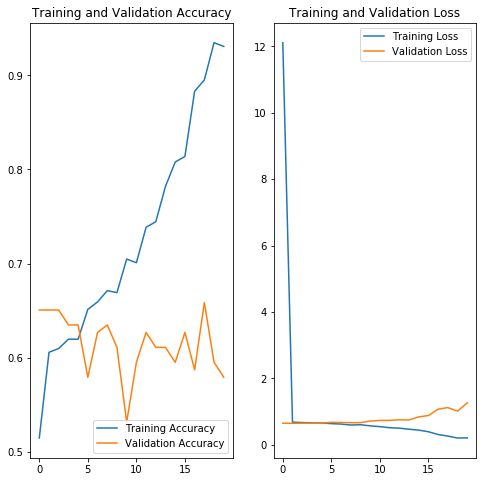

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
